In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style('white')
pl.style.use('seaborn-whitegrid')
%matplotlib inline

In [6]:
column_names=['user_id','item_id','rating','timestamp']

In [16]:
df=pd.read_csv('u.data',sep='\t',names=column_names)
movie_title=pd.read_csv('Movie_Id_Titles')

In [18]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [19]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [21]:
df=pd.merge(df,movie_title,on='item_id')

In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [36]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [47]:
bar=df.groupby('title')['rating'].count().sort_values(ascending=False)
bar

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [68]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [70]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [72]:
ratings['No of Ratings']=df.groupby('title')['rating'].count()

In [74]:
ratings.head()

,rating,No of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


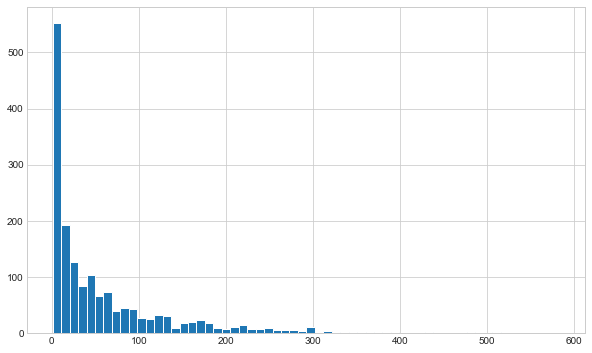

In [99]:
pl.figure(figsize=(10,6))
pl.hist(ratings['No of Ratings'],bins=60)
pl.show()

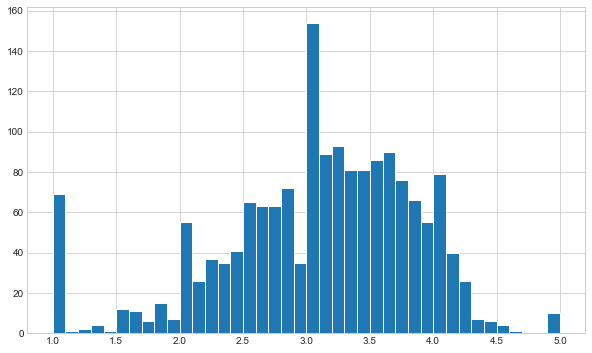

In [108]:
pl.figure(figsize=(10,6))
a=pl.hist(ratings['rating'],bins=40)
pl.show()

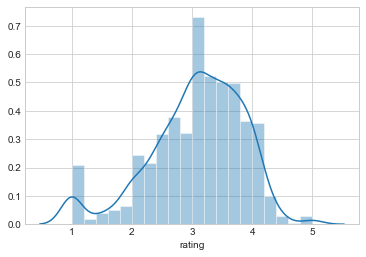

In [128]:
sns.distplot(ratings['rating'],bins=20,hist=True,
            kde=True)